In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pickle

In [6]:
df = pd.read_csv('coords4.csv')

In [7]:
df

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
0,a,0.300754,0.953779,-1.611118e-07,0.0,0.418001,0.931192,-0.011599,0.0,0.506635,...,-0.064659,0.0,0.328625,0.574582,-0.047942,0.0,0.325279,0.631790,-0.030373,0.0
1,a,0.368056,0.780531,-5.756525e-07,0.0,0.482163,0.728122,-0.030138,0.0,0.560704,...,-0.051991,0.0,0.383020,0.505697,-0.038884,0.0,0.377364,0.542915,-0.020753,0.0
2,a,0.400332,0.737481,-5.432689e-07,0.0,0.514085,0.707118,-0.024144,0.0,0.594843,...,-0.044166,0.0,0.412172,0.480557,-0.027262,0.0,0.397688,0.502922,-0.007267,0.0
3,a,0.417571,0.729523,-5.182889e-07,0.0,0.528845,0.700377,-0.024549,0.0,0.605643,...,-0.045568,0.0,0.421832,0.491835,-0.028828,0.0,0.409019,0.512937,-0.009977,0.0
4,a,0.445957,0.715962,-5.443882e-07,0.0,0.550341,0.691917,-0.023918,0.0,0.621572,...,-0.052074,0.0,0.443853,0.493556,-0.036345,0.0,0.431950,0.513770,-0.019236,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5544,z,0.331327,0.865333,-4.330287e-08,0.0,0.451828,0.804586,-0.001783,0.0,0.505009,...,-0.105509,0.0,0.476009,0.744237,-0.100370,0.0,0.439019,0.742406,-0.091761,0.0
5545,z,0.331639,0.867684,-5.232562e-08,0.0,0.450615,0.806146,-0.001436,0.0,0.504009,...,-0.104727,0.0,0.476939,0.745581,-0.099397,0.0,0.440244,0.744919,-0.090759,0.0
5546,z,0.328839,0.870239,-4.378466e-08,0.0,0.450862,0.809272,-0.000953,0.0,0.504228,...,-0.105638,0.0,0.478001,0.748753,-0.100182,0.0,0.440581,0.747212,-0.091529,0.0
5547,z,0.326799,0.872610,-6.365322e-08,0.0,0.445649,0.811784,0.000326,0.0,0.499957,...,-0.104778,0.0,0.475740,0.751595,-0.098543,0.0,0.438765,0.750359,-0.089477,0.0


In [8]:
df[df['class']=='d']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z19,v19,x20,y20,z20,v20,x21,y21,z21,v21
608,d,0.390240,1.002028,5.258815e-09,0.0,0.453013,0.990047,-0.028482,0.0,0.512819,...,-0.054516,0.0,0.347154,0.770103,-0.041178,0.0,0.345186,0.791661,-0.024297,0.0
609,d,0.378588,0.935452,2.582883e-07,0.0,0.445679,0.913857,-0.019886,0.0,0.498911,...,-0.041524,0.0,0.385656,0.739666,-0.032374,0.0,0.388747,0.772268,-0.021458,0.0
610,d,0.398888,0.877197,1.432787e-07,0.0,0.464627,0.861531,-0.017507,0.0,0.519574,...,-0.052635,0.0,0.415815,0.730074,-0.044350,0.0,0.410848,0.743909,-0.034161,0.0
611,d,0.412384,0.836559,-2.647755e-08,0.0,0.477903,0.824945,-0.020703,0.0,0.537021,...,-0.066506,0.0,0.425880,0.716614,-0.057216,0.0,0.421633,0.719162,-0.046852,0.0
612,d,0.412170,0.832669,-1.517204e-08,0.0,0.475651,0.822366,-0.024520,0.0,0.533433,...,-0.070120,0.0,0.425832,0.720534,-0.061823,0.0,0.417117,0.717989,-0.049582,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,d,0.398078,0.724402,1.350678e-07,0.0,0.441788,0.724630,-0.023442,0.0,0.497056,...,-0.070631,0.0,0.400213,0.629963,-0.064458,0.0,0.391477,0.623332,-0.054640,0.0
812,d,0.398458,0.726653,9.073912e-08,0.0,0.443312,0.729089,-0.022861,0.0,0.499845,...,-0.071041,0.0,0.401501,0.633541,-0.065860,0.0,0.392634,0.624026,-0.057420,0.0
813,d,0.400565,0.726399,8.608105e-08,0.0,0.444422,0.727331,-0.021822,0.0,0.500610,...,-0.069917,0.0,0.402389,0.631397,-0.064224,0.0,0.393628,0.623647,-0.055448,0.0
814,d,0.401728,0.727270,8.488926e-08,0.0,0.446642,0.727997,-0.024728,0.0,0.503159,...,-0.073050,0.0,0.404926,0.630712,-0.066804,0.0,0.396743,0.621671,-0.057439,0.0


In [9]:
x = df.drop('class', axis=1) #chua features
y = df['class'] #chua class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [10]:
x_test.values

array([[ 3.42013657e-01,  6.11460865e-01,  4.03775459e-07, ...,
         4.11869496e-01, -2.14795861e-02,  0.00000000e+00],
       [ 3.91830921e-01,  7.79076040e-01, -4.38844836e-07, ...,
         7.04185784e-01, -4.22039255e-02,  0.00000000e+00],
       [ 4.38072324e-01,  7.22979307e-01,  2.52565712e-07, ...,
         4.04163003e-01, -5.27579002e-02,  0.00000000e+00],
       ...,
       [ 5.29808640e-01,  5.68732858e-01, -4.05168208e-07, ...,
         4.18941110e-01, -2.95193028e-02,  0.00000000e+00],
       [ 3.56772363e-01,  7.63178885e-01, -8.54118696e-08, ...,
         6.54130876e-01, -5.82101494e-02,  0.00000000e+00],
       [ 4.18365419e-01,  7.45898128e-01,  8.87038141e-07, ...,
         6.27352118e-01, -1.18760854e-01,  0.00000000e+00]])

In [11]:
pipelines = {
    'knn':make_pipeline( StandardScaler(), KNeighborsClassifier(n_neighbors=3)),
    'rf':make_pipeline( StandardScaler(), RandomForestClassifier()),
}

In [12]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train.values, y_train)
    fit_models[algo] = model

In [13]:
fit_models

{'knn': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=3))]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())])}

In [14]:
fit = []
for algo, model in fit_models.items():
    yhat = model.predict(x_test.values)
    fit.append([algo, metrics.accuracy_score(y_test, yhat)])

max = fit[0]
for i in fit:
    if i[1]>max[1]: max = i
    print(i)

print("max: {}, model: {}".format(max[1], max[0]))

['knn', 0.9921921921921922]
['rf', 0.9915915915915916]
max: 0.9921921921921922, model: knn


In [15]:
x_test, y_test

(            x1        y1            z1   v1        x2        y2        z2  \
 419   0.342014  0.611461  4.037755e-07  0.0  0.412032  0.616233  0.002343   
 3974  0.391831  0.779076 -4.388448e-07  0.0  0.468583  0.757082 -0.024232   
 368   0.438072  0.722979  2.525657e-07  0.0  0.497059  0.706112 -0.020086   
 2410  0.424908  0.755288  7.766184e-08  0.0  0.490353  0.728227 -0.025666   
 5197  0.444863  0.729776 -4.263404e-07  0.0  0.512470  0.681028 -0.018308   
 ...        ...       ...           ...  ...       ...       ...       ...   
 726   0.376722  0.694527  4.539780e-08  0.0  0.422451  0.695155 -0.023698   
 698   0.387427  0.712891  9.616358e-08  0.0  0.432483  0.717161 -0.025841   
 3807  0.529809  0.568733 -4.051682e-07  0.0  0.605203  0.543929 -0.026475   
 646   0.356772  0.763179 -8.541187e-08  0.0  0.418141  0.750586 -0.020698   
 4698  0.418365  0.745898  8.870381e-07  0.0  0.479987  0.728721 -0.027957   
 
        v2        x3        y3  ...       z19  v19       x20  

[65  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 67  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 53  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 59  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0 66  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 55  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 64  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 67  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 58  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 62  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 58  0  0  0  0

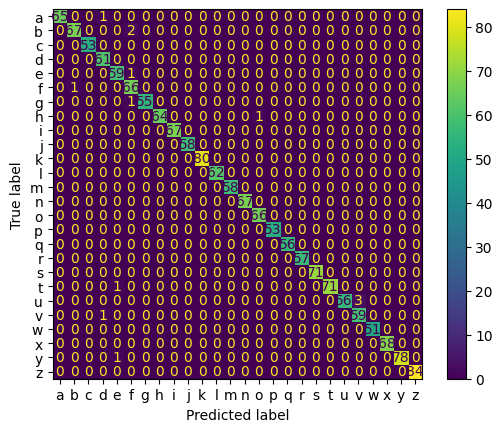

              precision    recall  f1-score   support

           a       1.00      0.98      0.99        66
           b       0.99      0.97      0.98        69
           c       1.00      1.00      1.00        53
           d       0.97      1.00      0.98        61
           e       0.97      0.98      0.98        60
           f       0.94      0.99      0.96        67
           g       1.00      0.98      0.99        56
           h       1.00      0.98      0.99        65
           i       1.00      1.00      1.00        67
           j       1.00      1.00      1.00        58
           k       1.00      1.00      1.00        80
           l       1.00      1.00      1.00        62
           m       1.00      1.00      1.00        58
           n       1.00      1.00      1.00        67
           o       0.99      1.00      0.99        66
           p       1.00      1.00      1.00        53
           q       1.00      1.00      1.00        56
           r       1.00    

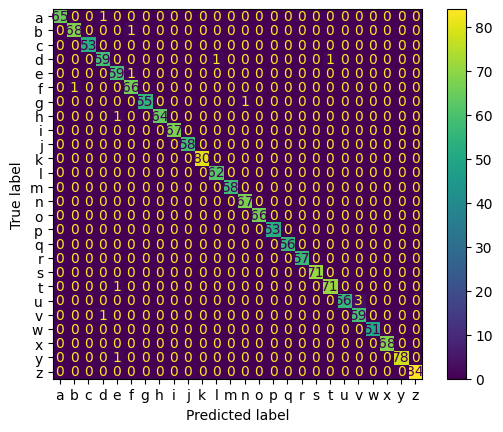

              precision    recall  f1-score   support

           a       1.00      0.98      0.99        66
           b       0.99      0.99      0.99        69
           c       1.00      1.00      1.00        53
           d       0.97      0.97      0.97        61
           e       0.95      0.98      0.97        60
           f       0.97      0.99      0.98        67
           g       1.00      0.98      0.99        56
           h       1.00      0.98      0.99        65
           i       1.00      1.00      1.00        67
           j       1.00      1.00      1.00        58
           k       1.00      1.00      1.00        80
           l       0.98      1.00      0.99        62
           m       1.00      1.00      1.00        58
           n       0.99      1.00      0.99        67
           o       1.00      1.00      1.00        66
           p       1.00      1.00      1.00        53
           q       1.00      1.00      1.00        56
           r       1.00    

In [22]:
import matplotlib.pyplot as plt

fit2 = []
for algo, model in fit_models.items():
    ytrue = y_test
    ypredict = model.predict(x_test.values)
    cm=metrics.confusion_matrix(y_true=ytrue, y_pred=ypredict)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    print(cm.ravel())
    cm_display.plot()
    plt.show()
    print(metrics.classification_report(y_true=ytrue, y_pred=ypredict))
    
for i in fit2:
    print(i)

In [17]:
fit_models[max[0]].predict(x_test.values)

array(['c', 't', 'b', ..., 's', 'd', 'w'], dtype=object)

In [18]:
y_test

419     c
3974    t
368     b
2410    l
5197    y
       ..
726     d
698     d
3807    s
646     d
4698    w
Name: class, Length: 1665, dtype: object

In [19]:
with open('model.pkl', 'wb') as f:
    pickle.dump(fit_models[max[0]], f)